In [1]:
from numpy import *
import numpy as np

In [7]:
# Examples
a = np.array([1, 2, 3])
a**2

np.arange(10)

np.sin(a)

array([0.84147098, 0.90929743, 0.14112001])

In [11]:
# Il ne faut pas utiliser le module math avec des tableaux numpy
import math

# a = np.array([1, 2, 3])
# math.sin(a)

In [12]:
# Comparaison de la vitesse entre une liste et un tableau 
a = np.random.rand(1000000)

%timeit a**2

def carre(x):
    return [elm**2 for elm in x]
b = list(a)

%timeit carre(b)

426 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
222 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Avantages (et inconvénients) des tableaux


In [21]:
# ATTENTION
a = np.array([1, 2, 3])
a[2] = 7.1
a

a = np.array([1.2, 2, 3])
a[2] = 7J

TypeError: can't convert complex to float

# Création d'un tableau
Il existe plusieurs fonctions pour créer un tableau.

* array :  partir d'une liste
* zeros, ones, eye
* arange
* linspace, logspace
* loadtxt
* load/save

Le type est déterminé automatiquement. On peut le forcer avec l'argument dtype

In [26]:
zeros(10, dtype=complex)
ones(10, dtype=complex)
eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [30]:
linspace(0, 1, 10, endpoint=False)


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [33]:
# Attention pour linspace
# Si on veut contrôler delta_x, c'est mieux ainsi
N = 1000
a = 1
b = 3
delta_x = (b-a)/N
x = np.arange(N)*delta_x + a
np.sum(sin(x))*delta_x

1.5309946433470316

In [34]:
logspace(1, 4)

array([   10.        ,    11.51395399,    13.25711366,    15.26417967,
          17.57510625,    20.23589648,    23.29951811,    26.82695795,
          30.88843596,    35.56480306,    40.94915062,    47.14866363,
          54.28675439,    62.50551925,    71.9685673 ,    82.86427729,
          95.40954763,   109.8541142 ,   126.48552169,   145.63484775,
         167.68329368,   193.06977289,   222.29964825,   255.95479227,
         294.70517026,   339.32217719,   390.69399371,   449.8432669 ,
         517.94746792,   596.36233166,   686.648845  ,   790.60432109,
         910.29817799,  1048.11313415,  1206.79264064,  1389.49549437,
        1599.85871961,  1842.06996933,  2120.95088792,  2442.05309455,
        2811.76869797,  3237.45754282,  3727.59372031,  4291.93426013,
        4941.71336132,  5689.86602902,  6551.2855686 ,  7543.12006335,
        8685.11373751, 10000.        ])

In [36]:
data = loadtxt('data.txt')

In [38]:
save('data.npy', data)

In [41]:
open('data.npy', 'rb').read()

b"\x93NUMPY\x01\x00v\x00{'descr': '<f8', 'fortran_order': False, 'shape': (3,), }                                                            \n\xcd\xcc\xcc\xcc\xcc\xdc^@\xcd\xcc\xcc\xcc\xcc\xacO@\xaa>?\xd8\xa0\x08\xc4K"

In [43]:
save('test.npy', np.linspace(0, 1, 1000000))
savetxt('test.txt', np.linspace(0, 1, 1000000))

In [44]:
%timeit load('test.npy')
%timeit loadtxt('test.txt')

1.11 ms ± 9.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.84 s ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
loadtxt?

# Fonctions vectorisées
C'est une fonction qui calcul sur un tableau élément par élément

In [46]:
x = linspace(-1, 1, 51, endpoint=False)*pi

In [50]:
# Souvent il n'y a rien a faire
def f(x):
    return sin(x)**2 + cos(x)**2

f(x)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
# Sinon, on utiliser le décorateur vectorize
# Mais il existe des solutions pour éviter d'avoir à 
# l'utiliser (c.f. prochaine partie)
@vectorize
def mafonction(a):
    if a>0:
        return a
    else:
        return -a
    
mafonction(x)

array([3.14159265, 3.01839294, 2.89519323, 2.77199352, 2.64879381,
       2.52559409, 2.40239438, 2.27919467, 2.15599496, 2.03279525,
       1.90959553, 1.78639582, 1.66319611, 1.5399964 , 1.41679669,
       1.29359698, 1.17039726, 1.04719755, 0.92399784, 0.80079813,
       0.67759842, 0.5543987 , 0.43119899, 0.30799928, 0.18479957,
       0.06159986, 0.06159986, 0.18479957, 0.30799928, 0.43119899,
       0.5543987 , 0.67759842, 0.80079813, 0.92399784, 1.04719755,
       1.17039726, 1.29359698, 1.41679669, 1.5399964 , 1.66319611,
       1.78639582, 1.90959553, 2.03279525, 2.15599496, 2.27919467,
       2.40239438, 2.52559409, 2.64879381, 2.77199352, 2.89519323,
       3.01839294])

In [53]:
x = linspace(-1, 1, 1000000, endpoint=False)*pi
%timeit mafonction(x)

%timeit np.abs(x)

185 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
408 µs ± 5.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [55]:
x = linspace(-1, 1, 51, endpoint=False)*pi
x>0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [54]:
# Il faut connaitre l'origine de cette erreur
if x>0:
    pass

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [58]:
np.where(x>0, x, -x)

array([3.14159265, 3.01839294, 2.89519323, 2.77199352, 2.64879381,
       2.52559409, 2.40239438, 2.27919467, 2.15599496, 2.03279525,
       1.90959553, 1.78639582, 1.66319611, 1.5399964 , 1.41679669,
       1.29359698, 1.17039726, 1.04719755, 0.92399784, 0.80079813,
       0.67759842, 0.5543987 , 0.43119899, 0.30799928, 0.18479957,
       0.06159986, 0.06159986, 0.18479957, 0.30799928, 0.43119899,
       0.5543987 , 0.67759842, 0.80079813, 0.92399784, 1.04719755,
       1.17039726, 1.29359698, 1.41679669, 1.5399964 , 1.66319611,
       1.78639582, 1.90959553, 2.03279525, 2.15599496, 2.27919467,
       2.40239438, 2.52559409, 2.64879381, 2.77199352, 2.89519323,
       3.01839294])

# Indexer un tableau

In [64]:
x = linspace(-1, 1, 51, endpoint=False)*pi
x[1:-1:3]
# x[start:stop:step], comme range ou arange

array([-3.01839294, -2.64879381, -2.27919467, -1.90959553, -1.5399964 ,
       -1.17039726, -0.80079813, -0.43119899, -0.06159986,  0.30799928,
        0.67759842,  1.04719755,  1.41679669,  1.78639582,  2.15599496,
        2.52559409,  2.89519323])

In [65]:
# C'est un racourcis pour créer un slice
x[4:10:2]
x[slice(4, 10, 2)]

array([-2.64879381, -2.40239438, -2.15599496])

In [66]:
# tout sauf le dernier
x[:-1]

array([-3.14159265, -3.01839294, -2.89519323, -2.77199352, -2.64879381,
       -2.52559409, -2.40239438, -2.27919467, -2.15599496, -2.03279525,
       -1.90959553, -1.78639582, -1.66319611, -1.5399964 , -1.41679669,
       -1.29359698, -1.17039726, -1.04719755, -0.92399784, -0.80079813,
       -0.67759842, -0.5543987 , -0.43119899, -0.30799928, -0.18479957,
       -0.06159986,  0.06159986,  0.18479957,  0.30799928,  0.43119899,
        0.5543987 ,  0.67759842,  0.80079813,  0.92399784,  1.04719755,
        1.17039726,  1.29359698,  1.41679669,  1.5399964 ,  1.66319611,
        1.78639582,  1.90959553,  2.03279525,  2.15599496,  2.27919467,
        2.40239438,  2.52559409,  2.64879381,  2.77199352,  2.89519323])

In [67]:
# Les deux derniers
x[-2:]

array([2.89519323, 3.01839294])

In [68]:
# La différence entre deux éléments consécutifs
x[1:] - x[:-1]

array([0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971,
       0.12319971, 0.12319971, 0.12319971, 0.12319971, 0.12319971])

In [70]:
# Indexer avec un tableau d'entier
a = np.array([1, 5, 2, 19])
x[a]
# [x[a[i]] for i in range(len(a))]

[-3.018392941684311,
 -2.5255940940623827,
 -2.895193229778829,
 -0.8007981273856335]

In [72]:
# Par exemple : argsort
# Les trois éléments les plus petits
x = np.random.rand(10)
print(x)
x.argsort()

[0.54884742 0.3181093  0.27501774 0.73902631 0.13390705 0.16144872
 0.36282377 0.04113715 0.69277039 0.0012674 ]


array([9, 7, 4, 5, 2, 1, 6, 0, 8, 3])

In [74]:
x[x.argsort()][:3]

array([0.0012674 , 0.04113715, 0.13390705])

In [76]:
# Avec un tableau de booléens
x = np.array([1, 4, 7])
mask = np.array([True, False, True])
x[mask]

array([1, 7])

In [78]:
x = linspace(-1, 1, 51, endpoint=False)*pi
x[x<0] = -x[x<0]
x

array([3.14159265, 3.01839294, 2.89519323, 2.77199352, 2.64879381,
       2.52559409, 2.40239438, 2.27919467, 2.15599496, 2.03279525,
       1.90959553, 1.78639582, 1.66319611, 1.5399964 , 1.41679669,
       1.29359698, 1.17039726, 1.04719755, 0.92399784, 0.80079813,
       0.67759842, 0.5543987 , 0.43119899, 0.30799928, 0.18479957,
       0.06159986, 0.06159986, 0.18479957, 0.30799928, 0.43119899,
       0.5543987 , 0.67759842, 0.80079813, 0.92399784, 1.04719755,
       1.17039726, 1.29359698, 1.41679669, 1.5399964 , 1.66319611,
       1.78639582, 1.90959553, 2.03279525, 2.15599496, 2.27919467,
       2.40239438, 2.52559409, 2.64879381, 2.77199352, 2.89519323,
       3.01839294])

# Tableau dans la mémoire
* strides
* from numpy.lib.stride_tricks import as_strided

In [79]:
a = []
b = a
b.append(1)
a

[1]

In [81]:
a = np.arange(10)
b = a[:3]
b[0] = 10
a

array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [83]:
a.shape

(10,)

In [86]:
a = np.linspace(0, 1, 11)
a.dtype = int64
a

array([                  0, 4591870180066957722, 4596373779694328218,
       4599075939470750516, 4600877379321698714, 4602678819172646912,
       4603579539098121012, 4604480259023595111, 4605380978949069210,
       4606281698874543309, 4607182418800017408])

In [87]:
b = a[::2]

In [89]:
b.strides

(16,)

In [92]:
a = zeros((4, 3))
a.strides

(24, 8)

In [100]:
from numpy.lib.stride_tricks import as_strided
a = np.arange(10)
b = as_strided(a, shape=((6, 5)), strides=(8, 8))
print(b)
b.mean(axis=1)

[[0 1 2 3 4]
 [1 2 3 4 5]
 [2 3 4 5 6]
 [3 4 5 6 7]
 [4 5 6 7 8]
 [5 6 7 8 9]]


array([2., 3., 4., 5., 6., 7.])

# Modifier un tableau

In [ ]:
x = random.rand(10)


In [ ]:
x = random.rand(10)


In [ ]:
x = random.rand(10)
x[x>.5] = .5

In [ ]:
# Valeur absolue?


# Tableaux nD

In [103]:
a = array([[1,2], [3, 4]])
# l'index est un tuple
a[0, 1]
a[(0, 1)]

2

In [106]:
x = random.rand(5, 5)
# Récupérer une colonne
x[:,0]

array([0.99354384, 0.50709081, 0.40567789, 0.22505617, 0.77510393])

In [107]:
# méthode reshape
x = random.rand(25)
x.reshape((5, 5))

array([[0.52682327, 0.2084377 , 0.38585482, 0.0182256 , 0.39390772],
       [0.93198385, 0.3979379 , 0.79036961, 0.44712876, 0.44304728],
       [0.91647594, 0.98899087, 0.13835314, 0.96537821, 0.98326485],
       [0.47176717, 0.75622538, 0.68354505, 0.43482501, 0.29712069],
       [0.13260371, 0.3946025 , 0.40166721, 0.85857601, 0.63600896]])

In [108]:
x = random.rand(5, 3)
x.strides

(24, 8)

In [109]:
# Attention, numpy évite de recopier la memoire
x = arange(10)
b = x[1::2]
b[2] = 100
x

array([  0,   1,   2,   3,   4, 100,   6,   7,   8,   9])

In [110]:
x = arange(10)
b = x[x%2==0]
b[2] = 100
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [114]:
# meshgrid
a, b = meshgrid([1, 2, 3], [7, 8, 9])
print(a)
print(b)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[7 7 7]
 [8 8 8]
 [9 9 9]]


In [116]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/pierre/sources/anaconda3/envs/enseignement/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


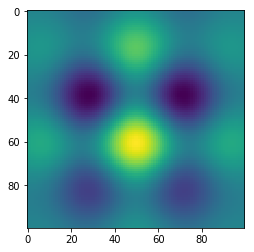

In [117]:

# Création d'une image 2D avec meshgrid

x = linspace(-.5, .5, 100)*4*pi
y = linspace(-.5, .5, 100)*4*pi
X, Y = meshgrid(x, y)
R = sqrt(X**2 + Y**2)
imshow((sin(Y)+cos(X))*exp(-R**2/30))

# Broadcast

In [121]:
# Si sur une dimension la taille du tableau vaut 1, alors numpy peut l'étendre
# pour qu'elle ait la même valeur que celle de l'autre tableau
x = random.rand(5, 5)
a = array([arange(5)])
print(a.shape)
x + a
x[2:4, :] = a
x

(1, 5)


array([[0.92874789, 0.99928113, 0.99495406, 0.59320801, 0.94042115],
       [0.97127373, 0.20523655, 0.66387538, 0.83758507, 0.18480328],
       [0.        , 1.        , 2.        , 3.        , 4.        ],
       [0.        , 1.        , 2.        , 3.        , 4.        ],
       [0.58038363, 0.18360571, 0.79472972, 0.01851453, 0.93105912]])

In [118]:
x = np.arange(10)
x + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [122]:
# Il y a une syntaxe simple pour rajouter une dimension de taille 1
# C'est newaxis
a = arange(5)
b = a[np.newaxis, :]
x = random.rand(5, 5)
x[2:4, :] = b
x

array([[0.33659407, 0.14415855, 0.2120748 , 0.9101024 , 0.28653792],
       [0.01231557, 0.55846326, 0.9595955 , 0.68527341, 0.34719014],
       [0.        , 1.        , 2.        , 3.        , 4.        ],
       [0.        , 1.        , 2.        , 3.        , 4.        ],
       [0.30734603, 0.29378768, 0.93172135, 0.40450542, 0.44829058]])

In [123]:
# Exemple : calculer une moyenne pondérée 
# Chaque ligne est un élève, chaque colonne un examen
notes = random.rand(10, 5)*20
print(notes)
coef = array([1, 4, 2, 5, 8])

[[ 6.9861976   1.66874956  5.47450923  1.76198036 15.24951145]
 [ 9.82670768 16.53926247  4.03370009 10.00846543 12.45787648]
 [ 4.37991353  8.31873939  3.44580549 19.08573226 17.81067019]
 [ 1.55285286  4.62466209  1.86973751  9.00418331 15.07982796]
 [ 6.17803948  6.22691403 16.26522764 19.41950218  4.11769283]
 [ 7.33493738 12.74167655  0.48395714 12.25650806  5.84498684]
 [14.69081768  4.08369963  0.98034275 14.17391055  3.97960331]
 [ 1.21297965 17.52633006  5.19177721 11.44161688  4.42687064]
 [ 9.08112765  4.32419288 19.23497282 16.11220491  9.3179044 ]
 [15.36745837 16.52192155  3.01650156  2.85085734 16.10447335]]


In [127]:
# Il est inutile de faire des boucles
(notes*coef[np.newaxis, :]).sum(axis=1)/np.sum(coef)

array([ 7.77081039, 11.68782484, 14.12302525,  9.47252582,  9.68276022,
        8.36559964,  6.78463405,  8.71624519, 10.99760523, 11.52891106])

# Au delà de numpy : numba
* Calculer $\pi$ (avec une formule très très lente!!!)
$$ \frac\pi4 = \sum_i \frac{(-1)^i}{2i+1} = 1 - \frac13 + \frac 15 - \frac17 + \ldots $$


In [129]:
def pi_python(N):
    res = 0
    coef = 1
    for i in range(N):
        res += coef/(2*i+1)
        coef = -coef
    return 4*res

%timeit pi_python(1000000) # 155 ms

def pi_np(N):
    Ti = arange(N)
    return 4*np.sum((1-2*(Ti%2))/(2*Ti+1))

%timeit pi_np(1000000) # 28.3ms

from numba import jit, int64, float64
numba_pi = jit(float64(int64))(pi_python)

@jit( float64(int64) )
def pi_python(N):
    res = 0
    coef = 1
    for i in range(N):
        res += coef/(2*i+1)
        coef = -coef
    return 4*res
%timeit numba_pi(1000000)

113 ms ± 1.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
29.2 ms ± 341 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.57 ms ± 80.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# Numpy utilise des variables intermédiaires -> vitesse limitée par la mémoire
(a + b)*c + a
tmp1 = a + b
tmp2 = tmp1*c
res = tmp2 + a